# Load and Explore Image Data

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# Load mnist images dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# categorical label, convert to one_hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

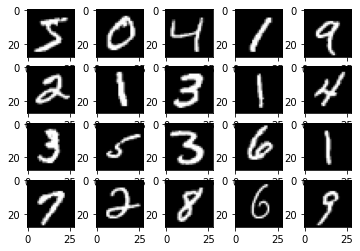

In [ ]:
# plot first few images
for i in range(20):
	plt.subplot(4,5,i+1)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# Specify Training and Validation Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the data into 75% training and 25% validation data sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, shuffle=True, random_state=0)

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Val  : X=%s, y=%s' % (X_val.shape, y_val.shape))
print('Test : X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(45000, 28, 28), y=(45000, 10)
Val  : X=(15000, 28, 28), y=(15000, 10)
Test : X=(10000, 28, 28), y=(10000, 10)


# Define Network Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Dense,Flatten

In [ ]:
# NOTE: you can play around with normalization before or after ReLU activation
net = Sequential()
# The first convolutional Layer
net.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1)))
net.add(BatchNormalization())
net.add(Activation('relu'))
net.add(MaxPooling2D((2, 2),strides=2))
# The Second convolutional Layer
net.add(Conv2D(16, (3, 3), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))
net.add(MaxPooling2D((2, 2),strides=2))
# The Third convolutional Layer
net.add(Conv2D(32, (3, 3), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))
# 
net.add(Flatten())
net.add(Dense(10, activation='softmax'))

# Train


In [ ]:
# Hyperparameters
lr = 0.1  # learning rate
mom = 0.9  # momentum
ep = 10    # epochs
bs = 100   # batch size

In [ ]:
# compile and fit the keras model
opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=mom)
net.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# insert model check point call back
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history = net.fit(X_train, y_train, epochs=ep, batch_size=bs, validation_data=(X_val,y_val), verbose=1, callbacks=[model_checkpoint_callback])
# The model weights (that are considered the best) are loaded into the model.
net.load_weights(checkpoint_filepath)

Epoch 1/10
450/450 [==============================] - 21s 45ms/step - loss: 0.1828 - accuracy: 0.9499 - val_loss: 0.1169 - val_accuracy: 0.9669
Epoch 2/10
450/450 [==============================] - 20s 45ms/step - loss: 0.0536 - accuracy: 0.9825 - val_loss: 0.0694 - val_accuracy: 0.9791
Epoch 3/10
450/450 [==============================] - 20s 44ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0586 - val_accuracy: 0.9831
Epoch 4/10
450/450 [==============================] - 20s 43ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0492 - val_accuracy: 0.9851
Epoch 5/10
450/450 [==============================] - 20s 44ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.0624 - val_accuracy: 0.9824
Epoch 6/10
450/450 [==============================] - 20s 44ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0571 - val_accuracy: 0.9839
Epoch 7/10
450/450 [==============================] - 20s 44ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0395 - val_accuracy:

# Test

In [ ]:
# You can visualize the results with a confusion matrix.
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
  c_mat = np.zeros((y_test.shape[1],y_test.shape[1]))
  for i in range(len(y_true)):
    c_mat[y_classified[i], y_true[i] ] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class')

313/313 [==============================] - 2s 7ms/step - loss: 0.0326 - accuracy: 0.9899
Test loss: 0.03260508179664612
Test accuracy: 0.9898999929428101
313/313 [==============================] - 2s 6ms/step


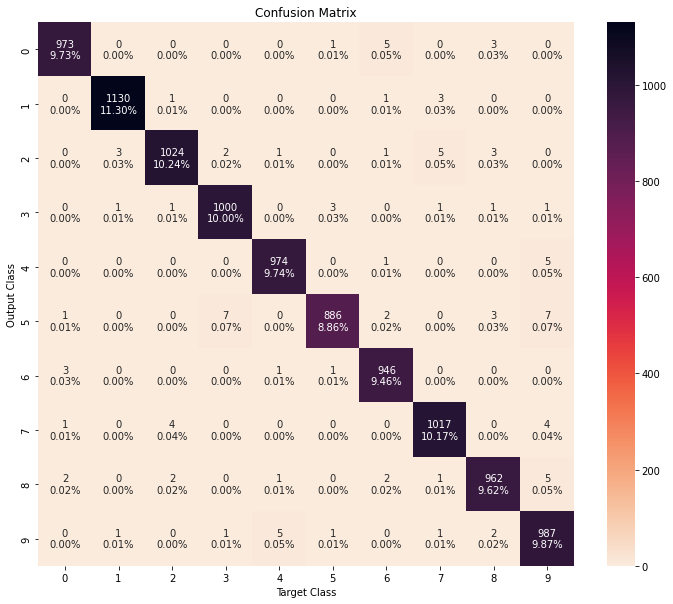

In [ ]:
# Evaluate the trained model using keras built-in function
score = net.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 

y_classified = np.argmax(net.predict(X_test), axis=1)
y_true =  np.argmax(y_test, axis=1)
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion matrix: \n", confusion_matrix(y_true, y_classified))

# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)

In [ ]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion matrix: \n", confusion_matrix(y_true, y_classified))
print("P(classification) =", np.round(accuracy_score(y_true, y_classified), 3))

Confusion matrix: 
 [[ 973    0    0    0    0    1    3    1    2    0]
 [   0 1130    3    1    0    0    0    0    0    1]
 [   0    1 1024    1    0    0    0    4    2    0]
 [   0    0    2 1000    0    7    0    0    0    1]
 [   0    0    1    0  974    0    1    0    1    5]
 [   1    0    0    3    0  886    1    0    0    1]
 [   5    1    1    0    1    2  946    0    2    0]
 [   0    3    5    1    0    0    0 1017    1    1]
 [   3    0    3    1    0    3    0    0  962    2]
 [   0    0    0    1    5    7    0    4    5  987]]
P(classification) = 0.99
